In [1]:
import pandas as pd

In [2]:
import nosqlite

In [3]:
conn = nosqlite.Connection("../data/results.db")

In [4]:
bigg = conn["bigg"]

In [5]:
bigg.count()

83

In [6]:
template = bigg.find_one()

In [7]:
class Bag(list):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def pluck(self, key, default=None):
        return Bag(doc.get(key, default) for doc in self)

In [8]:
bag = Bag(bigg.find())

In [9]:
conn.close()

In [10]:
len(bag)

83

In [11]:
template["report"]["test_basic"]["test_model_id_presence"].keys()

dict_keys(['data', 'duration', 'message', 'metric', 'result', 'summary', 'title', 'type'])

In [12]:
from IPython.display import display

In [13]:
import matplotlib

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [32]:
tests = list()
titles = list()
summaries = list()
metrics = list()
for module in template["report"]:
    for test in template["report"][module]:
        if template["report"][module][test].get("type", "") == "object":
            print("Skipping", test)
            continue
        t = template["report"][module][test].get("title", "")
        if t == "":
            print(test, "has no title.")
            continue
        tests.append(test)
        titles.append(t)
        summaries.append(template["report"][module][test].get("summary", ""))
        metrics.append(bag.pluck("report", {}).pluck(module, {}).pluck(test, {}).pluck("metric", float("nan")))

Skipping test_metabolite_annotation_overview
Skipping test_metabolite_annotation_wrong_ids
Skipping test_reaction_annotation_overview
Skipping test_reaction_annotation_wrong_ids
Skipping test_biomass_consistency
test_biomass_consistency[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_consistency[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_default_production
test_biomass_default_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_default_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_precursors_default_production
test_biomass_precursors_default_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_precursors_default_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_precursors_open_production
test_biomass_precursors_open_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_precursors_open_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skippi

In [33]:
meta = pd.DataFrame({"test_case": tests, "title": titles, "summary": summaries})

In [34]:
metric = pd.DataFrame({case: m for case, m in zip(tests, metrics)})

In [36]:
metric["source"] = "BiGG"

In [37]:
metric["model_id"] = bag.pluck("model_id", "")

In [38]:
metric.head()

,test_biomass_presence,test_blocked_reactions,test_compartments_presence,test_enzyme_complex_presence,test_find_deadends,test_find_disconnected,test_find_orphans,test_find_pure_metabolic_reactions,test_find_stoichiometrically_balanced_cycles,test_find_transport_reactions,...,test_ngam_presence,test_reaction_annotation_presence,test_reaction_charge_balance,test_reaction_id_namespace_consistency,test_reaction_mass_balance,test_reactions_presence,test_stoichiometric_consistency,test_transport_reaction_presence,source,model_id
0,1.0,0.210319,1.0,1.0,0.055085,0.0,0.072564,0.544703,1.0,0.300118,...,1.0,0.0,0.004332,1.0,0.004726,1.0,0.000000,1.0,BiGG,iSDY_1059
1,1.0,0.139855,1.0,1.0,0.049005,0.0,0.065850,0.558333,1.0,0.299275,...,1.0,0.0,0.013406,1.0,0.011594,1.0,0.001531,1.0,BiGG,iECO111_1330
2,1.0,0.151927,1.0,1.0,0.053608,0.0,0.063402,0.548991,1.0,0.306789,...,1.0,0.0,0.009541,1.0,0.009908,1.0,0.000000,1.0,BiGG,iUTI89_1310
3,1.0,0.197073,1.0,1.0,0.047273,0.0,0.070303,0.808780,1.0,0.105366,...,1.0,0.0,0.914146,1.0,0.017561,1.0,0.232727,1.0,BiGG,iNJ661
4,1.0,0.143697,1.0,1.0,0.045762,0.0,0.061362,0.553840,1.0,0.301727,...,1.0,0.0,0.006983,1.0,0.005880,1.0,0.000000,1.0,BiGG,iZ_1308


In [29]:
def plot_hist(values, title, summary):
    plt.hist(values, bins=20, range=(0, 1))
    plt.title(f"{title}\n{summary}")
    plt.xlabel("Metric")
    plt.ylabel("Frequency")
    plt.show()

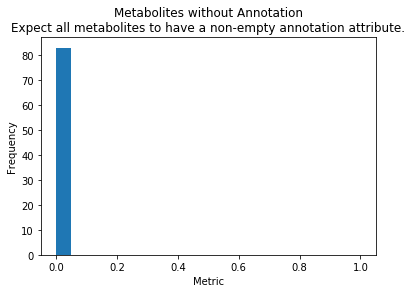

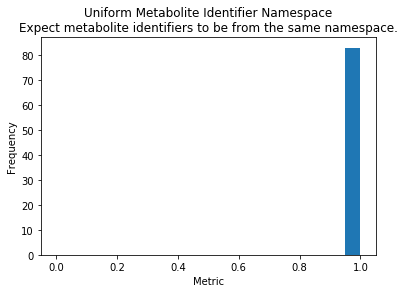

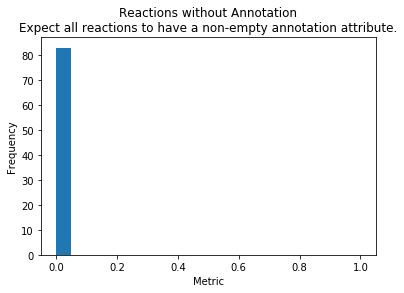

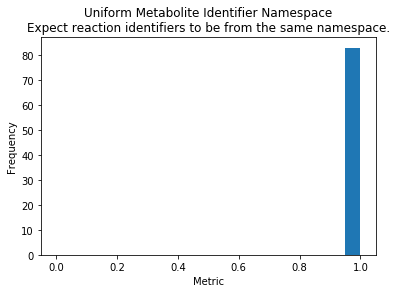

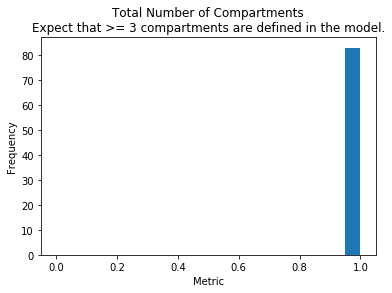

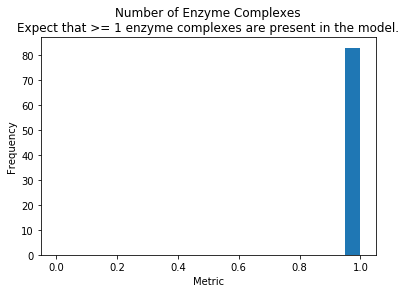

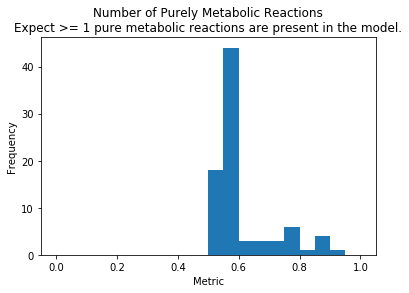

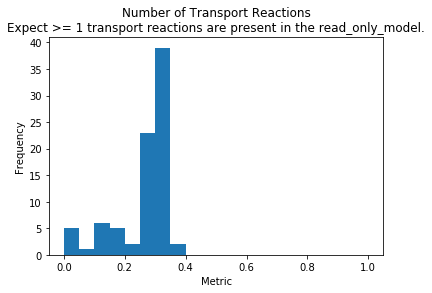

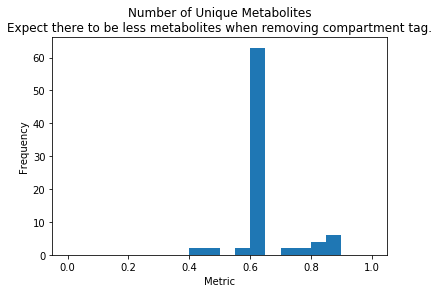

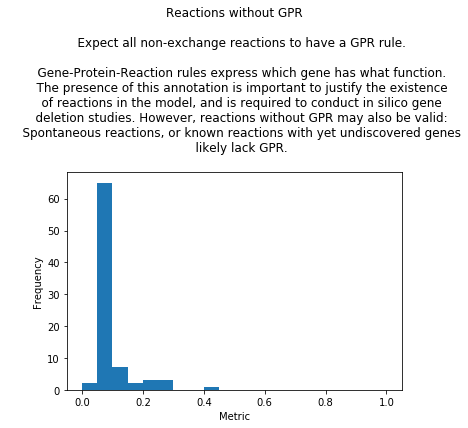

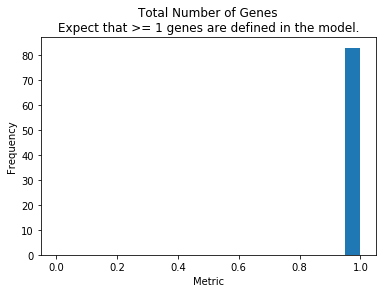

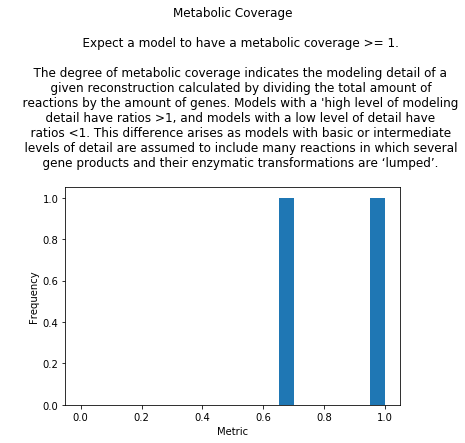

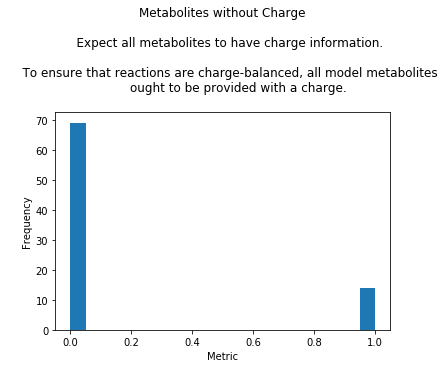

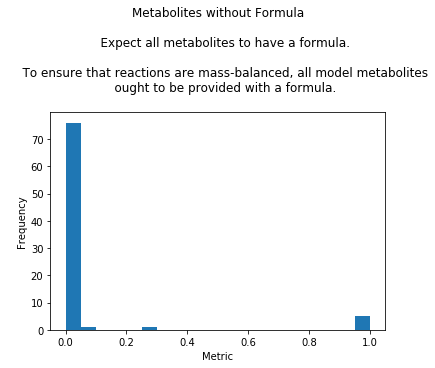

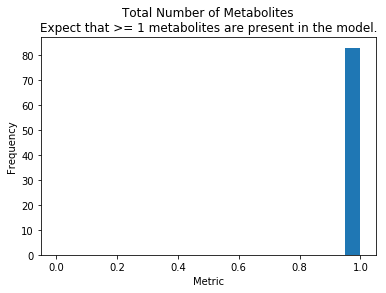

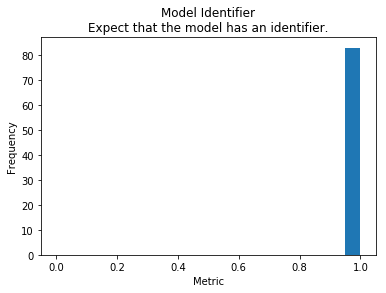

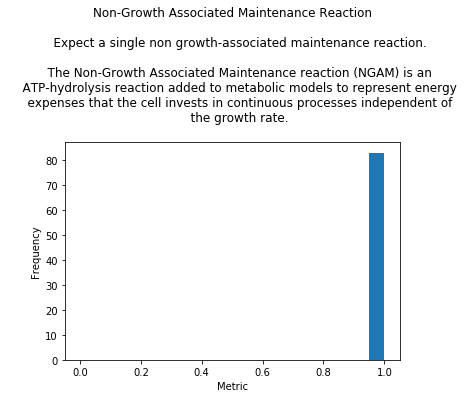

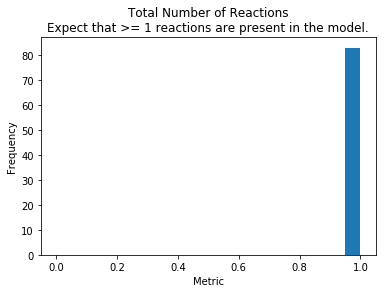

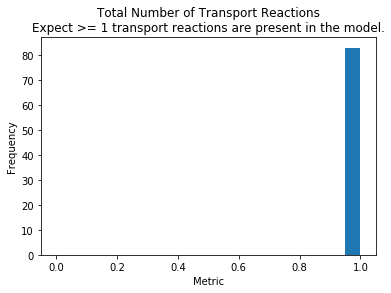

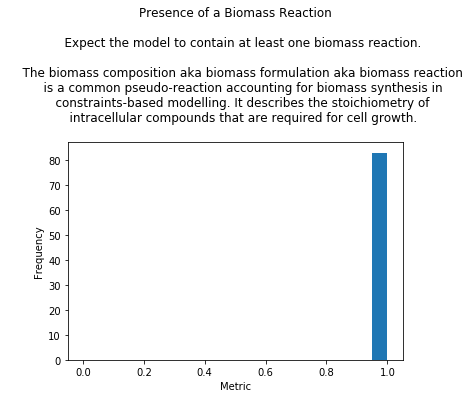

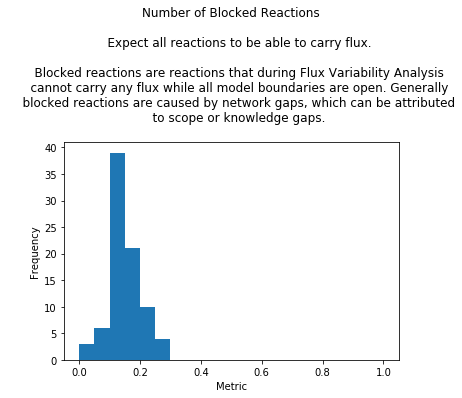

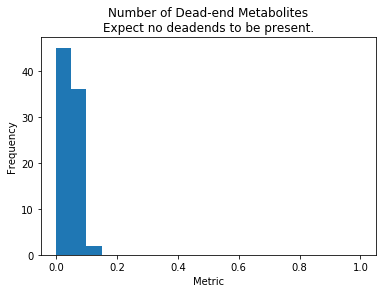

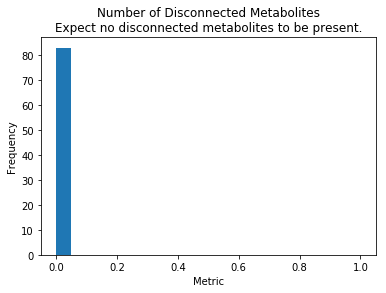

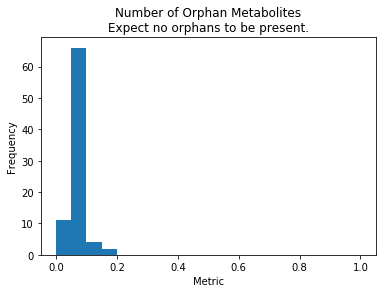

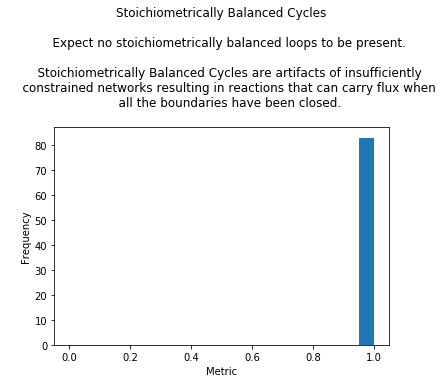

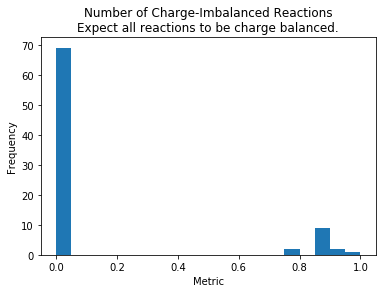

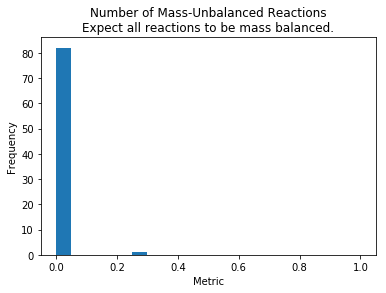

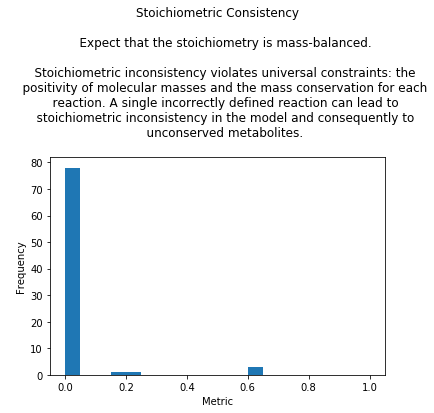

In [30]:
for m, t, s in zip(metric, title, summary):
    plot_hist(m, t, s)

In [39]:
from csv import QUOTE_NONNUMERIC

In [40]:
meta.to_csv("../data/meta.csv", index=False, quoting=QUOTE_NONNUMERIC)

In [41]:
metric.to_csv("../data/bigg/metrics.csv", index=False, quoting=QUOTE_NONNUMERIC)